In [21]:
%matplotlib inline
import numpy as np
from pylab import *

In [36]:
1+1j

(1+1j)

In [40]:
SD[npix/2, npix/2]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


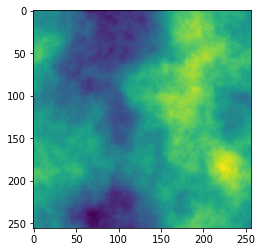

In [71]:
Dap = 6.5
npix = 256

r0 = Dap/2
dxy = Dap/npix
df = 1/(2 * npix * dxy)
x = np.arange(-npix/2, npix/2) * dxy
xf = np.arange(-npix/2, npix/2) * df
xx, yy = np.meshgrid(xf, xf)
rr = np.sqrt(xx**2 + yy**2)

SD = (0.023/r0**(5/3)) * rr**(-11/3)
SD[int(npix/2), int(npix/2)] = 0

rndScr = np.random.normal(size=(npix, npix)) + 1j * np.random.normal(size=(npix,npix))
phs = np.real(np.fft.ifft2(np.fft.fftshift(np.sqrt(SD) * rndScr * npix * npix)))

imshow(phs)

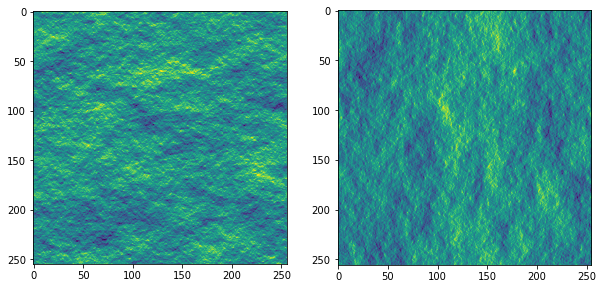

In [87]:
DX = np.diff(phs, axis=0)
DY = np.diff(phs, axis=1)

figure(figsize=(10,7))
subplot(1,2,1)
imshow(DX)
subplot(1,2,2)
imshow(DY)

In [182]:
npix = 512

tot = np.zeros((npix, npix))

figure(figsize=(6,12))
for imgnum in range(1,60):
    Dap = 6

    r0 = Dap/2
    dxy = Dap/npix
    df = 1/(2 * npix * dxy)
    x = np.arange(-npix/2, npix/2) * dxy
    xf = np.arange(-npix/2, npix/2) * df
    xx, yy = np.meshgrid(xf, xf)
    rr = np.sqrt(xx**2 + yy**2)

    SD = 0.0028 * r0**(-5/3) * rr**(-11/3)
    SD[int(npix/2), int(npix/2)] = 0

    rndScr = np.random.normal(size=(npix, npix)) + 1j * np.random.normal(size=(npix,npix))

    phs = np.real(np.fft.ifft2(np.sqrt(SD) * rndScr * npix * npix))
    
    tot += phs

    DX = np.diff(phs, axis=0)
    DY = np.diff(phs, axis=1)


    rt = np.zeros((120,120))


    for i in range(0, 250, 1):
        for j in range(0, 250, 1):

            x = DX[i,j] * 300 + 60
            y = DY[i,j] * 300 + 60
            
            x = phs[i,j]*300 + 60
            y = phs[i,j]*300 + 60

            try: rt[int(x), int(y)] += 1
            except: pass

    #subplot(6,1,imgnum)
    #imshow(phs)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


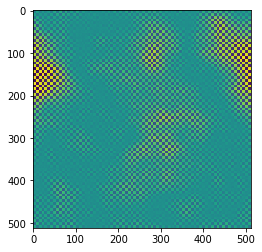

In [183]:
imshow(tot)